# Data Partitioning, Feature Scaling, Feature Selection, and Regularization with the Wine Dataset

## Data partitioning

In [50]:
import sys
import os

current_dir = os.path.abspath('')

src_dir = os.path.join(current_dir, '..', '..', 'src')

sys.path.append(src_dir)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing.sbs import SBS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print('Class labels', df_wine['Class label'].unique())

df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

Choosing the ratios between a training and test set takes some considerations. We want to provide enough data to go towards training but at the same time, the test set cannot be too smal, as it will not be representative of the model's performance. Common splits are 60:40, 70:30, and 80:20, depending on the size of the initial dataset. There are some exceptions are exceptionally large datasets, where a 90:10 & 99:1 splits is acceptable. For example, a dataset of 100k could have a 90:10 split, leaving 10k records for testing.

## Feature Scaling

While there are some exceptions to exclude feature scaling, such as decision trees, the majority of learning models function best when features are scaled to sit in common ranges. When talking about feature scaling, there are two common methods: normalization and standardization. Normalization scales the data between 0 and 1, while standardization scales the data to have a mean of 0 and a standard deviation of 1.

### Normalization

In [7]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

While the bounded ranges created my Min/Max scaling can be helpful, generally we use standardization for training machine learning models. It is helpful to spread the data out around 0 to 1/-1 since some models assume that data is normally distributed around 0. One reason for this is a lot of these models have the weights initialized with small values that are close to 0.

This centered scaled data can help the model converge faster.

Also normalization can be sensitive to outliers, as the range is determined by the min and max values of the data. While standardization is not as affected by outliers and preserves this information.

The equation for standardization is:

$$
X_{std} = \frac{X - \mu}{\sigma}
$$

Where:
- $X_{std}$ is the standardized value
- $X$ is the original value
- $\mu$ is the mean of the feature
- $\sigma$ is the standard deviation of the feature

To get the mean: $\mu = \frac{1}{n} \sum_{i=1}^{n} x_i$

And the standard deviation: $\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}$ which is the square root of the variance.

In [9]:
# Difference between Normalization and Standardization
ex = np.array([0, 1, 2, 3, 4, 5])

print('standardized:', (ex - ex.mean()) / ex.std())

print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


### Standardization

In [12]:
# To note: In both normalization and standardization, we fit the scaler on the training set and use the same parameters to transform the test set, instead of using fit_transform again on the test set.
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

Note: sklearn also provides a scalar called RobustScaler which is useful for small datasets with outliers. It scales the data according to the IQR (Interquartile Range) and the median, which can reduce the effect of the outliers.

## Combating Overfitting

One thing to note, when a model performs much better on the testing set as opposed to the training set, it is likely that the model is suffering from high variance (overfitting). This can be alivated by collecting more training data, using regularization, or choosing fewer features (dimensionality reduction).

### Regularization

In previous chapters we learned about L2 regularization, which can be calculated as:

$$
\text{L2 regularization} = \lambda \sum_{i=1}^{n} w_i^2
$$

L2 regularization is great for preventing overfitting, as it adds a penalty to the weights of the model. This penalty is proportional to the square of the magnitude of the weights. This can be controlled by the hyperparameter $\lambda$, which is the regularization strength. The higher the value of $\lambda$, the more the weights are penalized.

Then there is L1 regularization, which can be calculated as:

$$
\text{L1 regularization} = \lambda \sum_{i=1}^{n} |w_i|
$$

L1 regularization is great for feature selection, as it can drive some of the weights to 0. This can be controlled by the hyperparameter $\lambda$, which is the regularization strength. The higher the value of $\lambda$, the more the weights are penalized. In a way, L1 regularization can be seen as a way to reduce dimensionality. As you can see in the equation, L1 regularization is the sum of the absolute values of the weights.

#### When to use L1 vs L2 regularization

- L1 regularization is useful when you have a lot of features and you want to reduce the dimensionality of the model. You can usually be clued in on this when the model is quite complex and you suspect that not all features are important.
- L2 regularization is useful when you suspect that some features in the model are correlated. This is because L2 regularization will keep all features, but reduce the magnitude of the weights that some features have.

TODO: Go deeper into learning about the mathematics of L1 regularization

In [21]:
# In sklearn, for models that support it, we can use L1 regularization by setting the penalty parameter to 'l1'.
lr = OneVsRestClassifier(LogisticRegression(penalty='l1', solver='liblinear', C=1.0))

# Note: C = 1 is the default, but if we increase it we will reduce regularization and if we decrease it we will increase regularization
lr.fit(X_train_std, y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

for i, estimator in enumerate(lr.estimators_):
  print(f"Estimator {i} coefficients:")
  print(estimator.coef_)

Training accuracy: 1.0
Test accuracy: 1.0
Estimator 0 coefficients:
[[ 1.24547847  0.18066045  0.74168742 -1.15951708  0.          0.
   1.1756556   0.          0.          0.          0.          0.54084915
   2.51136399]]
Estimator 1 coefficients:
[[-1.53791523 -0.38674561 -0.99575822  0.36518726 -0.05933328  0.
   0.66802581  0.          0.         -1.93384296  1.23394528  0.
  -2.23089899]]
Estimator 2 coefficients:
[[ 0.13553774  0.16761662  0.35681988  0.          0.          0.
  -2.44099204  0.          0.          1.56681907 -0.81950921 -0.48826656
   0.        ]]


The estimator printouts are tied to the weights for each class. As we can see, L1 regularization has driven some of the weights to 0. While L1 regularization has worked, the model is not quite sparse, as there are more non-zero weights than zero weights. Lets increase the regularization strength to see if we can get a more sparse model.

/Users/brandonfeist/git/ml/python-machine-learning-book/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/brandonfeist/git/ml/python-machine-learning-book/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/brandonfeist/git/ml/python-machine-learning-book/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid

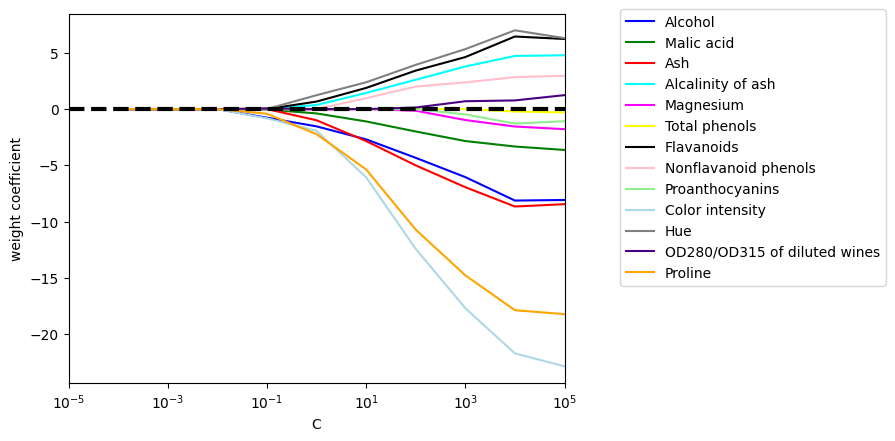

In [38]:
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
  # lr = OneVsRestClassifier(LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', random_state=0))
  lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', multi_class='ovr', random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  # weights.append(lr.estimators_[1].coef_)
  params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:, column], label=df_wine.columns[column + 1], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

### Feature Selection w/ Sequential Backward Selection (SBS)

While we won't go too deep into feature selection for dimensionality reduction in this chapter, the chapter did briefly go over SBS. SBS is a greedy algorithm that removes features one at a time, until the desired number of features is reached. It decides which features to remove by creating a criterion function that measures the performance of the model after removing a feature. Our version creates subsets of features and measures the performance of the model on these subsets. The subset that performs the best is kept while the feature not included in that subset is thrown away. This process is repeated until the desired number of features is reached. 

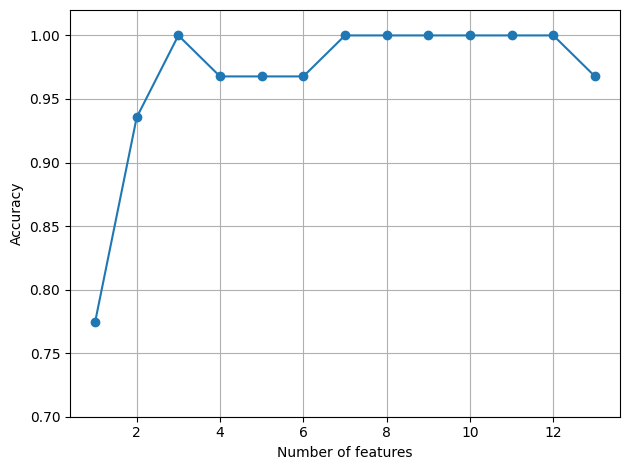

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

As we can see, performance increased after removing a 13th feature, the smallest subset we could have while attaining max performance was 3 features. After 3 features, the performance began to decrease dramatically.

In [42]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [46]:
# Original Dataset
knn.fit(X_train_std, y_train)

print('Full feature set accuracy:')
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test), '\n')

# Dataset with 3 features
knn.fit(X_train_std[:, k3], y_train)

print('Reduced feature set accuracy (3 features):')
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Full feature set accuracy:
Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629 

Reduced feature set accuracy (3 features):
Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


As we can see, we were able to reduce features down from 13 to 3 while losing minimal performance.

### Feature Importance w/ Random Forests

1. Proline: 0.1854526045327398
2. Flavanoids: 0.17475097557788735
3. Color intensity: 0.14391990337231417
4. OD280/OD315 of diluted wines: 0.13616194422145592
5. Alcohol: 0.11852941731789315
6. Hue: 0.05873899628096851
7. Total phenols: 0.05087242613744542
8. Magnesium: 0.03135708460816905
9. Malic acid: 0.02564835556426571
10. Proanthocyanins: 0.025569879019329143
11. Alcalinity of ash: 0.022365941937688507
12. Nonflavanoid phenols: 0.013353928195970423
13. Ash: 0.013278543233872916


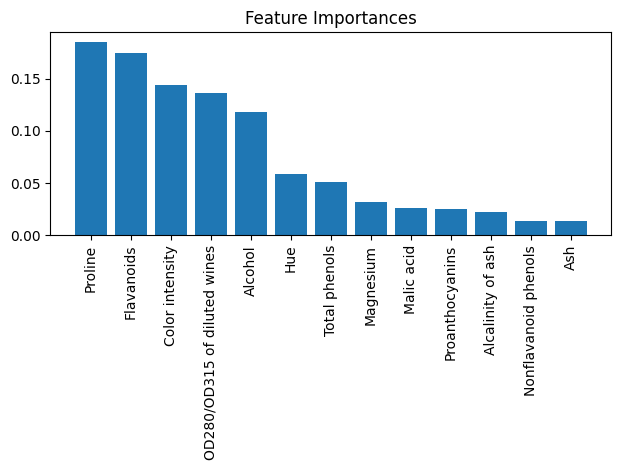

In [49]:
feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_

# Returns indices of importance in desc order, [::-1] reverses the array
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
  print(f"{f + 1}. {feat_labels[indices[f]]}: {importances[indices[f]]}")

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Using a forest of 500 trees, we can then fetch the feature importance from the sklearn RandomForestClassifier ensamble model. It should be noted that all the importance percentages of the features are suppose to add up to 1.0. As we can see from the results, proline, flavanoids, color intensity, OD280/OD315 of diluted wines, and alcohol are the most important features in the model. There is one gatcha when it comes to measuring importance of features using random forests, and that is when features are correlated. In this case, the importance of the features can be skewed. This is because the model will randomly select one of the correlated features to split on, which can lead to the other correlated features having a lower importance. This is why it is important to check for multicollinearity before using feature importance. If we are just concerned with the predictive performance of the model, then this is not as important, but it is something to keep in mind when we are concerned with the interperatation of feature importance values.

Last, sklearn does have a SelectFromModel function that can be used to select features based on a threshold of importance. This can be useful when we want to reduce the number of features in the model.

In [52]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)

print('Number of samples that meet this threshold criterion:', X_selected.shape[1])

for f in range(X_selected.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

Number of samples that meet this threshold criterion: 5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
